# 🔍 **Unsupervised learning approach : Clustering**

## 1) เตรียมข้อมูล 📦

### import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# เปิดไฟล์
import pandas as pd
df_58 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/mental_y58_data_calculated.xlsx')
df_58 = df_58.rename(columns={"Province": "NAME_1"})

df_59 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/mental_y59_data_calculated.xlsx')
df_59 = df_59.rename(columns={"Province": "NAME_1"})

df_60 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/mental_y60_data_calculated.xlsx')
df_60 = df_60.rename(columns={"Province": "NAME_1"})

df_61 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/mental_y61_data_calculated.xlsx')
df_61 = df_61.rename(columns={"Province": "NAME_1"})

df_62 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/mental_y62_data_calculated.xlsx')
df_62 = df_62.rename(columns={"Province": "NAME_1"})

df_63 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/mental_y63_data_calculated.xlsx')
df_63 = df_63.rename(columns={"Province": "NAME_1"})

df_64 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/mental_y64_data_calculated.xlsx')
df_64 = df_64.rename(columns={"Province": "NAME_1"})

df_65 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/mental_y65_data_calculated.xlsx')
df_65 = df_65.rename(columns={"Province": "NAME_1"})

df_66 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/mental_y66_data_calculated.xlsx')
df_66 = df_66.rename(columns={"Province": "NAME_1"})

### Dataset for K-prototype clustering

In [3]:
df_58

,NAME_1,Dementia,Alcoholic,Addicted to Amphetamine,Addicted to other drugs,Schizophrenia,Other Mental Illnesses,Bipolar Disorder,Depression,Anxiety Disorder,...,Autistic Disorder,ADHD,Self-Harm,Game Addiction(Older than 15 years old),Game Addiction(Younger than 15 years old),Other Psychosis,Epilepsy,Male_population,Women_population,Total_population
0,Amnat Charoen,12.772921,27.674663,0,17.828869,829.707686,0,0,320.653548,589.151000,...,1.330513,0.266103,4.523743,0,0,386.114770,102.449474,49992.149975,50007.850025,100000
1,Ang Thong,2.118839,3.178258,0,6.356516,583.386893,0,0,979.609710,1004.329494,...,0.353140,0.000000,2.825118,0,0,448.840642,6.709656,47974.390304,52025.609696,100000
2,Bangkok Metropolis,0.702673,1.001309,0,0.808074,22.520679,0,0,13.456193,20.904530,...,0.245936,0.035134,0.316203,0,0,36.222808,2.547191,47324.395798,52675.604202,100000
3,Bueng Kan,1.430049,2.145074,0,1.430049,515.532717,0,0,337.968282,319.139301,...,0.953366,0.476683,0.953366,0,0,13.347125,10.725369,50429.491427,49570.508573,100000
4,Buri Ram,12.205449,107.635615,0,114.212644,838.444760,0,0,481.134993,455.143079,...,2.150183,0.126481,8.537490,0,0,276.298473,107.066449,49868.996959,50131.003041,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Udon Thani,19.263266,33.122645,0,29.180987,597.669844,0,0,385.646769,792.845509,...,10.362747,1.652954,1.525803,0,0,168.855559,105.026123,49851.742785,50148.257215,100000
73,Uthai Thani,1.210709,2.421417,0,1.816063,468.241597,0,0,697.670899,817.531062,...,2.118740,0.605354,0.605354,0,0,401.047263,9.080315,49130.257124,50869.742876,100000
74,Uttaradit,6.307666,36.105951,0,10.222769,630.766621,0,0,589.005520,573.997625,...,1.740046,0.217506,1.522540,0,0,143.553783,54.376433,49128.889546,50871.110454,100000
75,Yala,1.746294,2.134360,0,7.373243,422.991325,0,0,242.152832,658.353011,...,0.970164,0.194033,0.776131,0,0,191.316260,23.477959,49645.211176,50354.788824,100000


In [4]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
df_list = [df_58, df_59, df_60, df_61, df_62, df_63, df_64, df_65, df_66]

for i in range(8) :
  if i == 0 :
    df1 = df_list[i]
    df2 = df_list[i + 1]
    dataset_all = df1.append(df2)
  else :
    df2 = df_list[i + 1]
    dataset_all = dataset_all.append(df2)

# เอา Epilepsy, ADHD ออกแล้ว
dataset_all = dataset_all.drop(columns=['NAME_1', 'Epilepsy', 'ADHD','Addicted to Amphetamine','Other Mental Illnesses','Bipolar Disorder',
              'Game Addiction(Older than 15 years old)','Game Addiction(Younger than 15 years old)',
              'Other Psychosis','Male_population', 'Women_population', 'Total_population'])

disorder = dataset_all.columns
dataset_all = dataset_all.transpose()

#dataset_all = dataset_all.apply(lambda x : (x - dataset_all.mean())/dataset_all.std(), axis=1)
#dataset_all = dataset_all.fillna(0)
dataset_all = pd.DataFrame(std_scaler.fit_transform(dataset_all))

dataset_all['disorder'] = disorder
dataset_all.index = range(1, 11) # 11 = จำนวน col ที่ใช้ + 1

dataset_all

<ipython-input-4-a0c475e1e17a>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_all = df1.append(df2)
<ipython-input-4-a0c475e1e17a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_all = dataset_all.append(df2)
<ipython-input-4-a0c475e1e17a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_all = dataset_all.append(df2)
<ipython-input-4-a0c475e1e17a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_all = dataset_all.append(df2)
<ipython-input-4-a0c475e1e17a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datase

,0,1,2,3,4,5,6,7,8,9,...,684,685,686,687,688,689,690,691,692,disorder
1,-0.594841,-0.632375,-0.610712,-0.630513,-0.695768,-0.632536,-0.571147,-0.687648,-0.516564,-0.691811,...,-0.752453,-0.753139,-0.789815,-0.778725,-0.677883,-0.424830,-0.692833,-0.732510,-0.797086,Dementia
2,-0.542441,-0.629760,-0.576527,-0.626649,-0.348149,-0.628858,-0.532266,-0.556714,-0.391841,-0.456924,...,0.269678,-0.348339,0.356553,0.325322,0.340548,0.689823,0.212689,-0.725914,0.245541,Alcoholic
3,-0.577062,-0.621915,-0.598647,-0.630513,-0.324191,-0.613410,-0.536288,-0.539903,-0.597734,-0.547769,...,-0.151299,0.738005,0.375346,0.137068,0.094954,0.281029,0.305414,0.008428,0.054602,Addicted to other drugs
4,2.277839,0.802345,1.886834,2.147867,2.313937,2.064146,0.787003,1.671435,2.611924,1.222474,...,0.865780,0.601484,0.435142,1.006505,1.729156,0.387500,0.474928,0.767688,1.546102,Schizophrenia
5,0.487794,1.780325,0.849206,1.188250,1.012381,1.090221,0.659635,1.141231,0.441136,1.146156,...,1.772564,1.567711,1.979579,1.000489,0.978094,1.770301,2.378697,1.465386,1.465707,Depression
6,1.431942,1.841340,1.701831,1.086492,0.917701,1.306486,2.574854,1.716373,0.865296,2.076905,...,1.491351,1.689416,1.273990,1.970423,1.348627,1.348363,0.745860,2.048022,1.144963,Anxiety Disorder
7,-0.611684,-0.634990,-0.652941,-0.633090,-0.707056,-0.648719,-0.583213,-0.678919,-0.568038,-0.691197,...,-1.047979,-0.918233,-0.976036,-0.826496,-0.907771,-0.850712,-0.847858,-0.694400,-0.639645,Intellectual Disabilities
8,-0.612620,-0.637605,-0.681094,-0.635666,-0.727328,-0.645041,-0.606676,-0.679243,-0.630400,-0.656005,...,-0.525126,-0.964269,-0.668516,-1.002719,-1.055199,-1.153036,-0.791353,-0.740571,-1.043297,Learning Disabilities
9,-0.635077,-0.636733,-0.662996,-0.633090,-0.732396,-0.651661,-0.593939,-0.697024,-0.598229,-0.712271,...,-0.946103,-0.906063,-1.042666,-0.861351,-0.912412,-1.099143,-0.926095,-0.691469,-0.983000,Autistic Disorder
10,-0.623849,-0.630632,-0.654952,-0.633090,-0.709129,-0.640627,-0.597961,-0.689588,-0.615551,-0.689560,...,-0.976413,-0.706573,-0.943576,-0.970517,-0.938113,-0.949296,-0.859449,-0.704660,-0.993887,Self-Harm


### Dataset for K-mean clustering

In [5]:
dataset = dataset_all.drop(columns = 'disorder')

## 2)K-prototype algorithm 📚


### install and import neccessary module

In [6]:
!pip install kmodes
!pip install ggplot
!pip install plotnine

In [7]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
from kmodes.kprototypes import KPrototypes
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore', category = FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### find optimal K

In [8]:
dfMatrix = dataset_all.to_numpy()

In [10]:
# from sklearn.metrics import silhouette_score
# K = []
# score = []
# for k in range(2,6):
#     labels = KMeans(n_clusters=k).fit(dataset_pca).predict(dataset_pca)
#     s = silhouette_score(dataset_pca, labels)
#     print("K = {}, Silhouette score = {:1.4f}".format(k, s))
#     K.append(k)
#     score.append(s)
# silhouette_df = pd.DataFrame({"K" : K, "Silhouette score" : score})
# silhouette_df.to_csv("silhouette_score.csv")
# silhouette_df

In [11]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 11): # จน col +1
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [693]) # จน col จาก dataset_all -1
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [12]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 6), 'Cost':cost})

In [13]:
df_cost

,Cluster,Cost
0,1,6924.494
1,2,2079.657
2,3,1114.035
3,4,633.938
4,5,330.408


In [14]:
from matplotlib import pyplot as plt

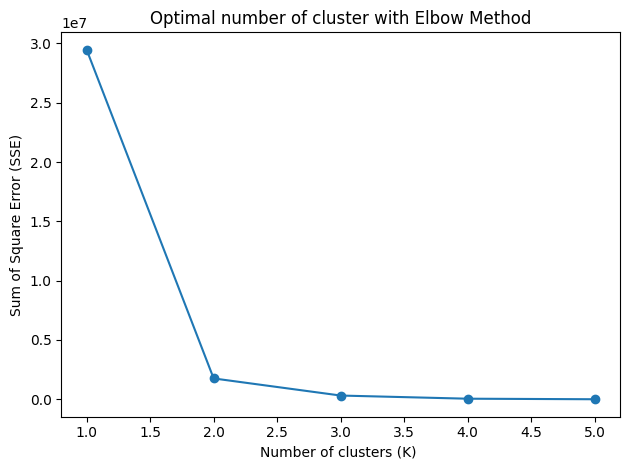

In [15]:
sse = {}
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k).fit(df_cost)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Optimal number of cluster with Elbow Method')
plt.xlabel("Number of clusters (K) ")
plt.ylabel("Sum of Square Error (SSE)")
plt.tight_layout();
plt.savefig('elbow_output.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

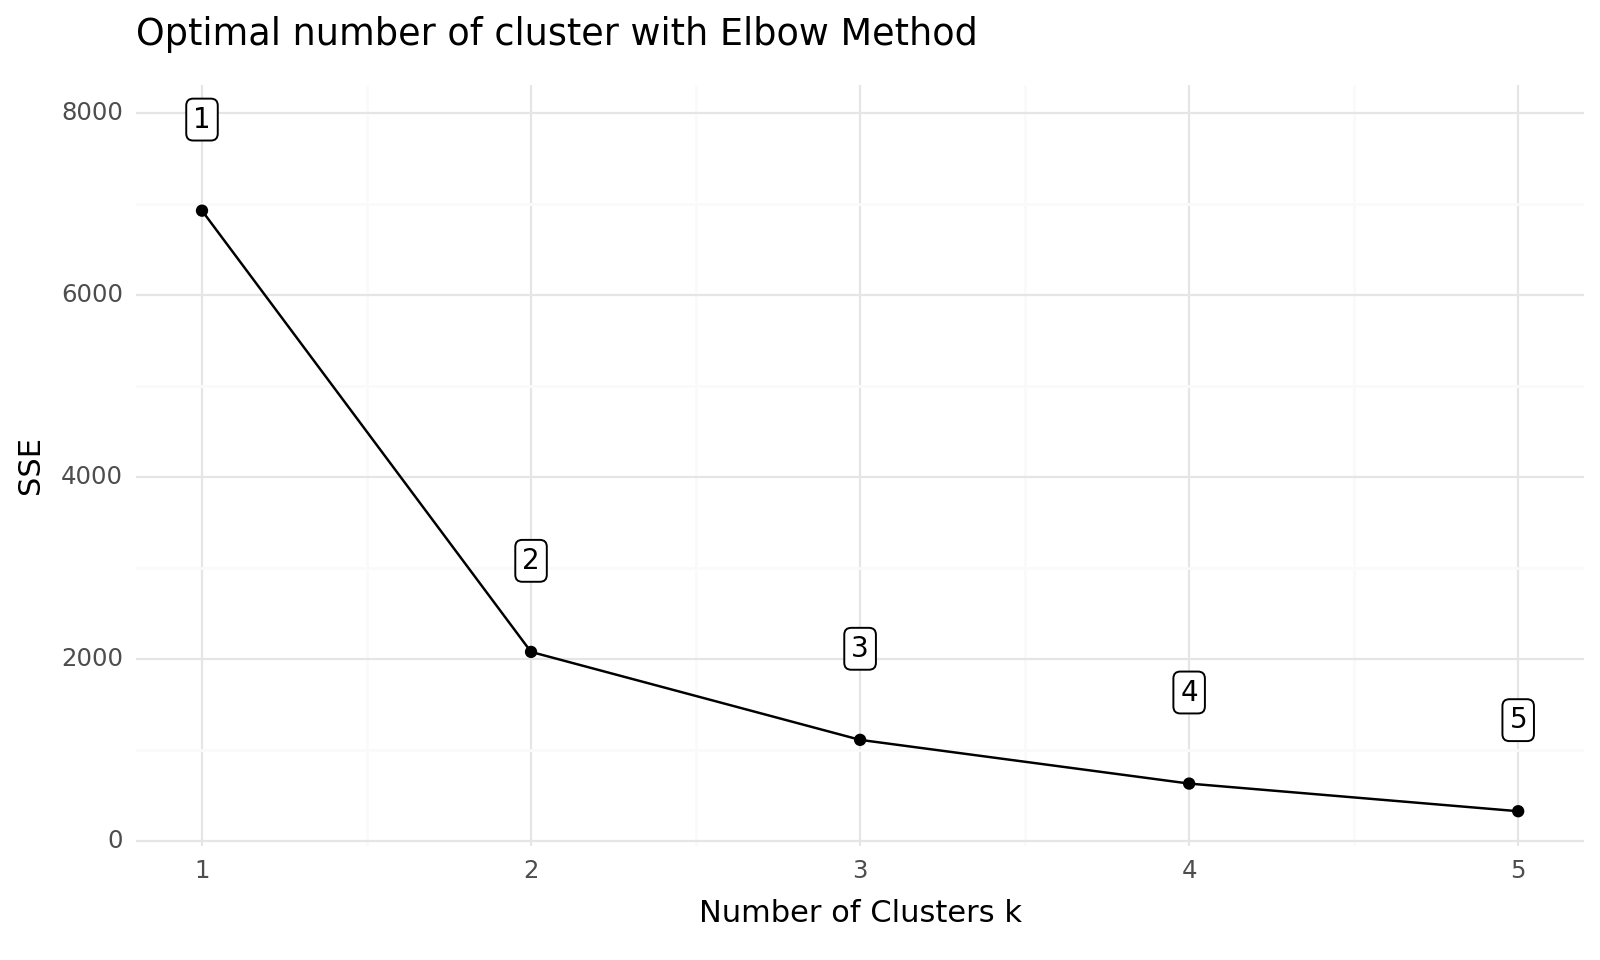

<Figure Size: (800 x 480)>

In [16]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('SSE')+
    theme_minimal()
)

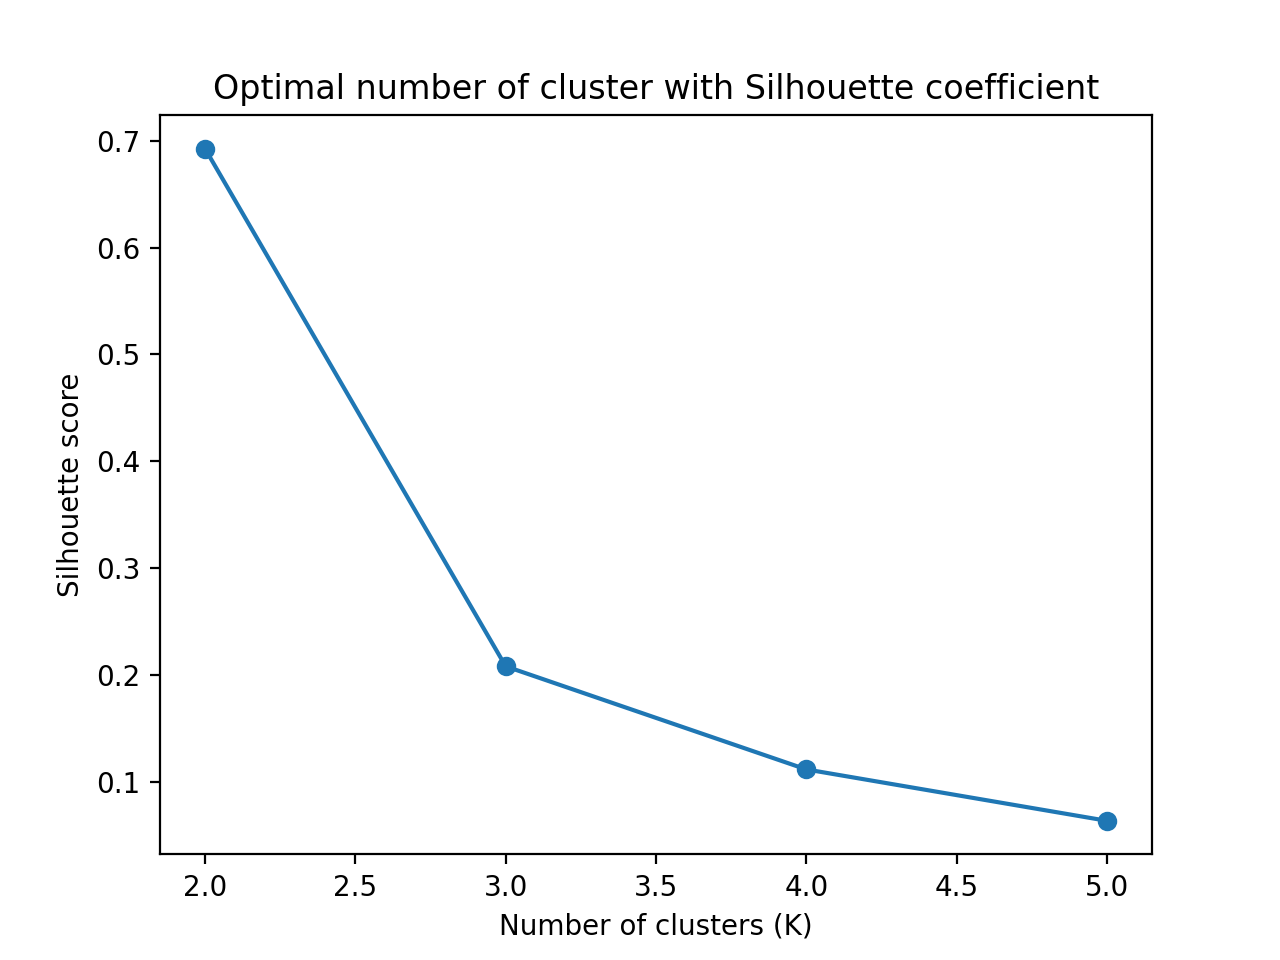

In [49]:
import matplotlib.pyplot as plt

Silhouette_score = [0.6924,0.2079,0.1114,0.0633]
k = [2,3,4,5]

plt.plot(k, Silhouette_score, marker='o')
plt.title('Optimal number of cluster with Silhouette coefficient')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
#plt.grid(True)
plt.savefig('Silhouette_score_output.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

### clustering

In [18]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [693]) # จน col จาก dataset_all -1

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=uint16)

In [19]:
# Add the cluster to the dataframe
cluster_data = dataset_all.copy()
cluster_data['Cluster Labels'] = kprototype.labels_

In [26]:
cluster_data

,0,1,2,3,4,5,6,7,8,9,...,685,686,687,688,689,690,691,692,disorder,Cluster Labels
1,-0.595,-0.632,-0.611,-0.631,-0.696,-0.633,-0.571,-0.688,-0.517,-0.692,...,-0.753,-0.790,-0.779,-0.678,-0.425,-0.693,-0.733,-0.797,Dementia,0
2,-0.542,-0.630,-0.577,-0.627,-0.348,-0.629,-0.532,-0.557,-0.392,-0.457,...,-0.348,0.357,0.325,0.341,0.690,0.213,-0.726,0.246,Alcoholic,0
3,-0.577,-0.622,-0.599,-0.631,-0.324,-0.613,-0.536,-0.540,-0.598,-0.548,...,0.738,0.375,0.137,0.095,0.281,0.305,0.008,0.055,Addicted to other drugs,0
4,2.278,0.802,1.887,2.148,2.314,2.064,0.787,1.671,2.612,1.222,...,0.601,0.435,1.007,1.729,0.387,0.475,0.768,1.546,Schizophrenia,1
5,0.488,1.780,0.849,1.188,1.012,1.090,0.660,1.141,0.441,1.146,...,1.568,1.980,1.000,0.978,1.770,2.379,1.465,1.466,Depression,1
6,1.432,1.841,1.702,1.086,0.918,1.306,2.575,1.716,0.865,2.077,...,1.689,1.274,1.970,1.349,1.348,0.746,2.048,1.145,Anxiety Disorder,1
7,-0.612,-0.635,-0.653,-0.633,-0.707,-0.649,-0.583,-0.679,-0.568,-0.691,...,-0.918,-0.976,-0.826,-0.908,-0.851,-0.848,-0.694,-0.640,Intellectual Disabilities,0
8,-0.613,-0.638,-0.681,-0.636,-0.727,-0.645,-0.607,-0.679,-0.630,-0.656,...,-0.964,-0.669,-1.003,-1.055,-1.153,-0.791,-0.741,-1.043,Learning Disabilities,0
9,-0.635,-0.637,-0.663,-0.633,-0.732,-0.652,-0.594,-0.697,-0.598,-0.712,...,-0.906,-1.043,-0.861,-0.912,-1.099,-0.926,-0.691,-0.983,Autistic Disorder,0
10,-0.624,-0.631,-0.655,-0.633,-0.709,-0.641,-0.598,-0.690,-0.616,-0.690,...,-0.707,-0.944,-0.971,-0.938,-0.949,-0.859,-0.705,-0.994,Self-Harm,0


In [27]:
summary_all = cluster_data.iloc[: , [693,694]] # จน col จาก dataset_all -1 , dataset_all

# summary_all.drop(index = 10, inplace=True)
summary_all = summary_all.sort_values(by='Cluster Labels')
summary_all.to_csv('k_prototype_2_cluster.csv')
summary_all

,disorder,Cluster Labels
1,Dementia,0
2,Alcoholic,0
3,Addicted to other drugs,0
7,Intellectual Disabilities,0
8,Learning Disabilities,0
9,Autistic Disorder,0
10,Self-Harm,0
4,Schizophrenia,1
5,Depression,1
6,Anxiety Disorder,1


In [29]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [693]) # จน col จาก dataset_all -1

array([2, 1, 1, 0, 0, 0, 2, 2, 2, 2], dtype=uint16)

In [30]:
# Add the cluster to the dataframe
cluster_data2 = dataset_all.copy()
cluster_data2['Cluster Labels'] = kprototype.labels_

In [32]:
summary_all2 = cluster_data2.iloc[: , [693,694]] # จน col จาก dataset_all -1 , dataset_all

# summary_all2.drop(index = 10, inplace=True)
summary_all2 = summary_all2.sort_values(by='Cluster Labels')
summary_all2.to_csv('k_prototype_3_cluster.csv')
summary_all2

,disorder,Cluster Labels
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
2,Alcoholic,1
3,Addicted to other drugs,1
1,Dementia,2
7,Intellectual Disabilities,2
8,Learning Disabilities,2
9,Autistic Disorder,2
10,Self-Harm,2


## 3) hierarchical clustering 📖

### Dataset 2015-2021 (ไม่ได้ใช้แล้ว ไปดู All year เลย)

#### Dataset 58

In [34]:
dataset_58

NameError: name 'dataset_58' is not defined

In [ ]:
dataset_58_num = dataset_58.iloc[:, 0:77]
dataset_58_num

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_58_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_58_num)

In [ ]:
# Add the cluster to the dataframe
dataset_58['Cluster Labels'] = cluster.labels_

In [ ]:
dataset_58

In [ ]:
hiera_summary_58 = dataset_58.iloc[: , [77,78]]

hiera_summary_58 = hiera_summary_58.sort_values(by='Cluster Labels')
hiera_summary_58

#### Dataset 59

In [ ]:
dataset_59_num = dataset_59.iloc[:, 0:77]
dataset_59_num

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_59_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_59_num)

In [ ]:
# Add the cluster to the dataframe
dataset_59['Cluster Labels'] = cluster.labels_

In [ ]:
dataset_59

In [ ]:
hiera_summary_59 = dataset_59.iloc[: , [77,78]]

hiera_summary_59 = hiera_summary_59.sort_values(by='Cluster Labels')
hiera_summary_59

#### Dataset 60

In [ ]:
dataset_60_num = dataset_60.iloc[:, 0:77]
dataset_60_num

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_60_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_60_num)

In [ ]:
# Add the cluster to the dataframe
dataset_60['Cluster Labels'] = cluster.labels_

In [ ]:
dataset_60

In [ ]:
hiera_summary_60 = dataset_60.iloc[: , [77,78]]

hiera_summary_60 = hiera_summary_60.sort_values(by='Cluster Labels')
hiera_summary_60

#### Dataset 61

In [ ]:
dataset_61_num = dataset_61.iloc[:, 0:77]
dataset_61_num

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_61_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_61_num)

In [ ]:
# Add the cluster to the dataframe
dataset_61['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_61 = dataset_61.iloc[: , [77,78]]

hiera_summary_61 = hiera_summary_61.sort_values(by='Cluster Labels')
hiera_summary_61

#### Dataset 62

In [ ]:
dataset_62_num = dataset_62.iloc[:, 0:77]
dataset_62_num

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_62_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_62_num)

In [ ]:
# Add the cluster to the dataframe
dataset_62['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_62 = dataset_62.iloc[: , [77,78]]

hiera_summary_62 = hiera_summary_62.sort_values(by='Cluster Labels')
hiera_summary_62

#### Dataset 63

In [ ]:
dataset_63_num = dataset_63.iloc[:, 0:77]
dataset_63_num

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_63_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_63_num)

In [ ]:
# Add the cluster to the dataframe
dataset_63['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_63 = dataset_63.iloc[: , [77,78]]

hiera_summary_63 = hiera_summary_63.sort_values(by='Cluster Labels')
hiera_summary_63

#### Dataset 64

In [ ]:
dataset_64_num = dataset_64.iloc[:, 0:77]
dataset_64_num

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_64_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_64_num)

In [ ]:
# Add the cluster to the dataframe
dataset_64['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_64 = dataset_64.iloc[: , [77,78]]

hiera_summary_64 = hiera_summary_64.sort_values(by='Cluster Labels')
hiera_summary_64

### All year dataset

In [35]:
dataset_all_num = dataset_all.iloc[:, 0:693]
# dataset_all_num.drop(index = 10, inplace=True)

# เอา'Epilepsy'ออกแล้ว
dataset_all_num.index = ['Dementia','Alcoholic','Addicted to other drugs','Schizophrenia','Depression','Anxiety Disorder','Intellectual Disabilities','Learning Disabilities','Autistic Disorder','Self-Harm']
dataset_all_num

,0,1,2,3,4,5,6,7,8,9,...,683,684,685,686,687,688,689,690,691,692
Dementia,-0.595,-0.632,-0.611,-0.631,-0.696,-0.633,-0.571,-0.688,-0.517,-0.692,...,-0.762,-0.752,-0.753,-0.790,-0.779,-0.678,-0.425,-0.693,-0.733,-0.797
Alcoholic,-0.542,-0.630,-0.577,-0.627,-0.348,-0.629,-0.532,-0.557,-0.392,-0.457,...,0.795,0.270,-0.348,0.357,0.325,0.341,0.690,0.213,-0.726,0.246
Addicted to other drugs,-0.577,-0.622,-0.599,-0.631,-0.324,-0.613,-0.536,-0.540,-0.598,-0.548,...,-0.029,-0.151,0.738,0.375,0.137,0.095,0.281,0.305,0.008,0.055
Schizophrenia,2.278,0.802,1.887,2.148,2.314,2.064,0.787,1.671,2.612,1.222,...,0.892,0.866,0.601,0.435,1.007,1.729,0.387,0.475,0.768,1.546
Depression,0.488,1.780,0.849,1.188,1.012,1.090,0.660,1.141,0.441,1.146,...,1.755,1.773,1.568,1.980,1.000,0.978,1.770,2.379,1.465,1.466
Anxiety Disorder,1.432,1.841,1.702,1.086,0.918,1.306,2.575,1.716,0.865,2.077,...,1.143,1.491,1.689,1.274,1.970,1.349,1.348,0.746,2.048,1.145
Intellectual Disabilities,-0.612,-0.635,-0.653,-0.633,-0.707,-0.649,-0.583,-0.679,-0.568,-0.691,...,-0.939,-1.048,-0.918,-0.976,-0.826,-0.908,-0.851,-0.848,-0.694,-0.640
Learning Disabilities,-0.613,-0.638,-0.681,-0.636,-0.727,-0.645,-0.607,-0.679,-0.630,-0.656,...,-1.006,-0.525,-0.964,-0.669,-1.003,-1.055,-1.153,-0.791,-0.741,-1.043
Autistic Disorder,-0.635,-0.637,-0.663,-0.633,-0.732,-0.652,-0.594,-0.697,-0.598,-0.712,...,-0.962,-0.946,-0.906,-1.043,-0.861,-0.912,-1.099,-0.926,-0.691,-0.983
Self-Harm,-0.624,-0.631,-0.655,-0.633,-0.709,-0.641,-0.598,-0.690,-0.616,-0.690,...,-0.886,-0.976,-0.707,-0.944,-0.971,-0.938,-0.949,-0.859,-0.705,-0.994


In [36]:
disorder = dataset_all_num.index
legend_df = pd.DataFrame({"index" : range(0,10), "disorder" : disorder})
legend_df.to_csv("legend.csv")
legend_df

,index,disorder
0,0,Dementia
1,1,Alcoholic
2,2,Addicted to other drugs
3,3,Schizophrenia
4,4,Depression
5,5,Anxiety Disorder
6,6,Intellectual Disabilities
7,7,Learning Disabilities
8,8,Autistic Disorder
9,9,Self-Harm


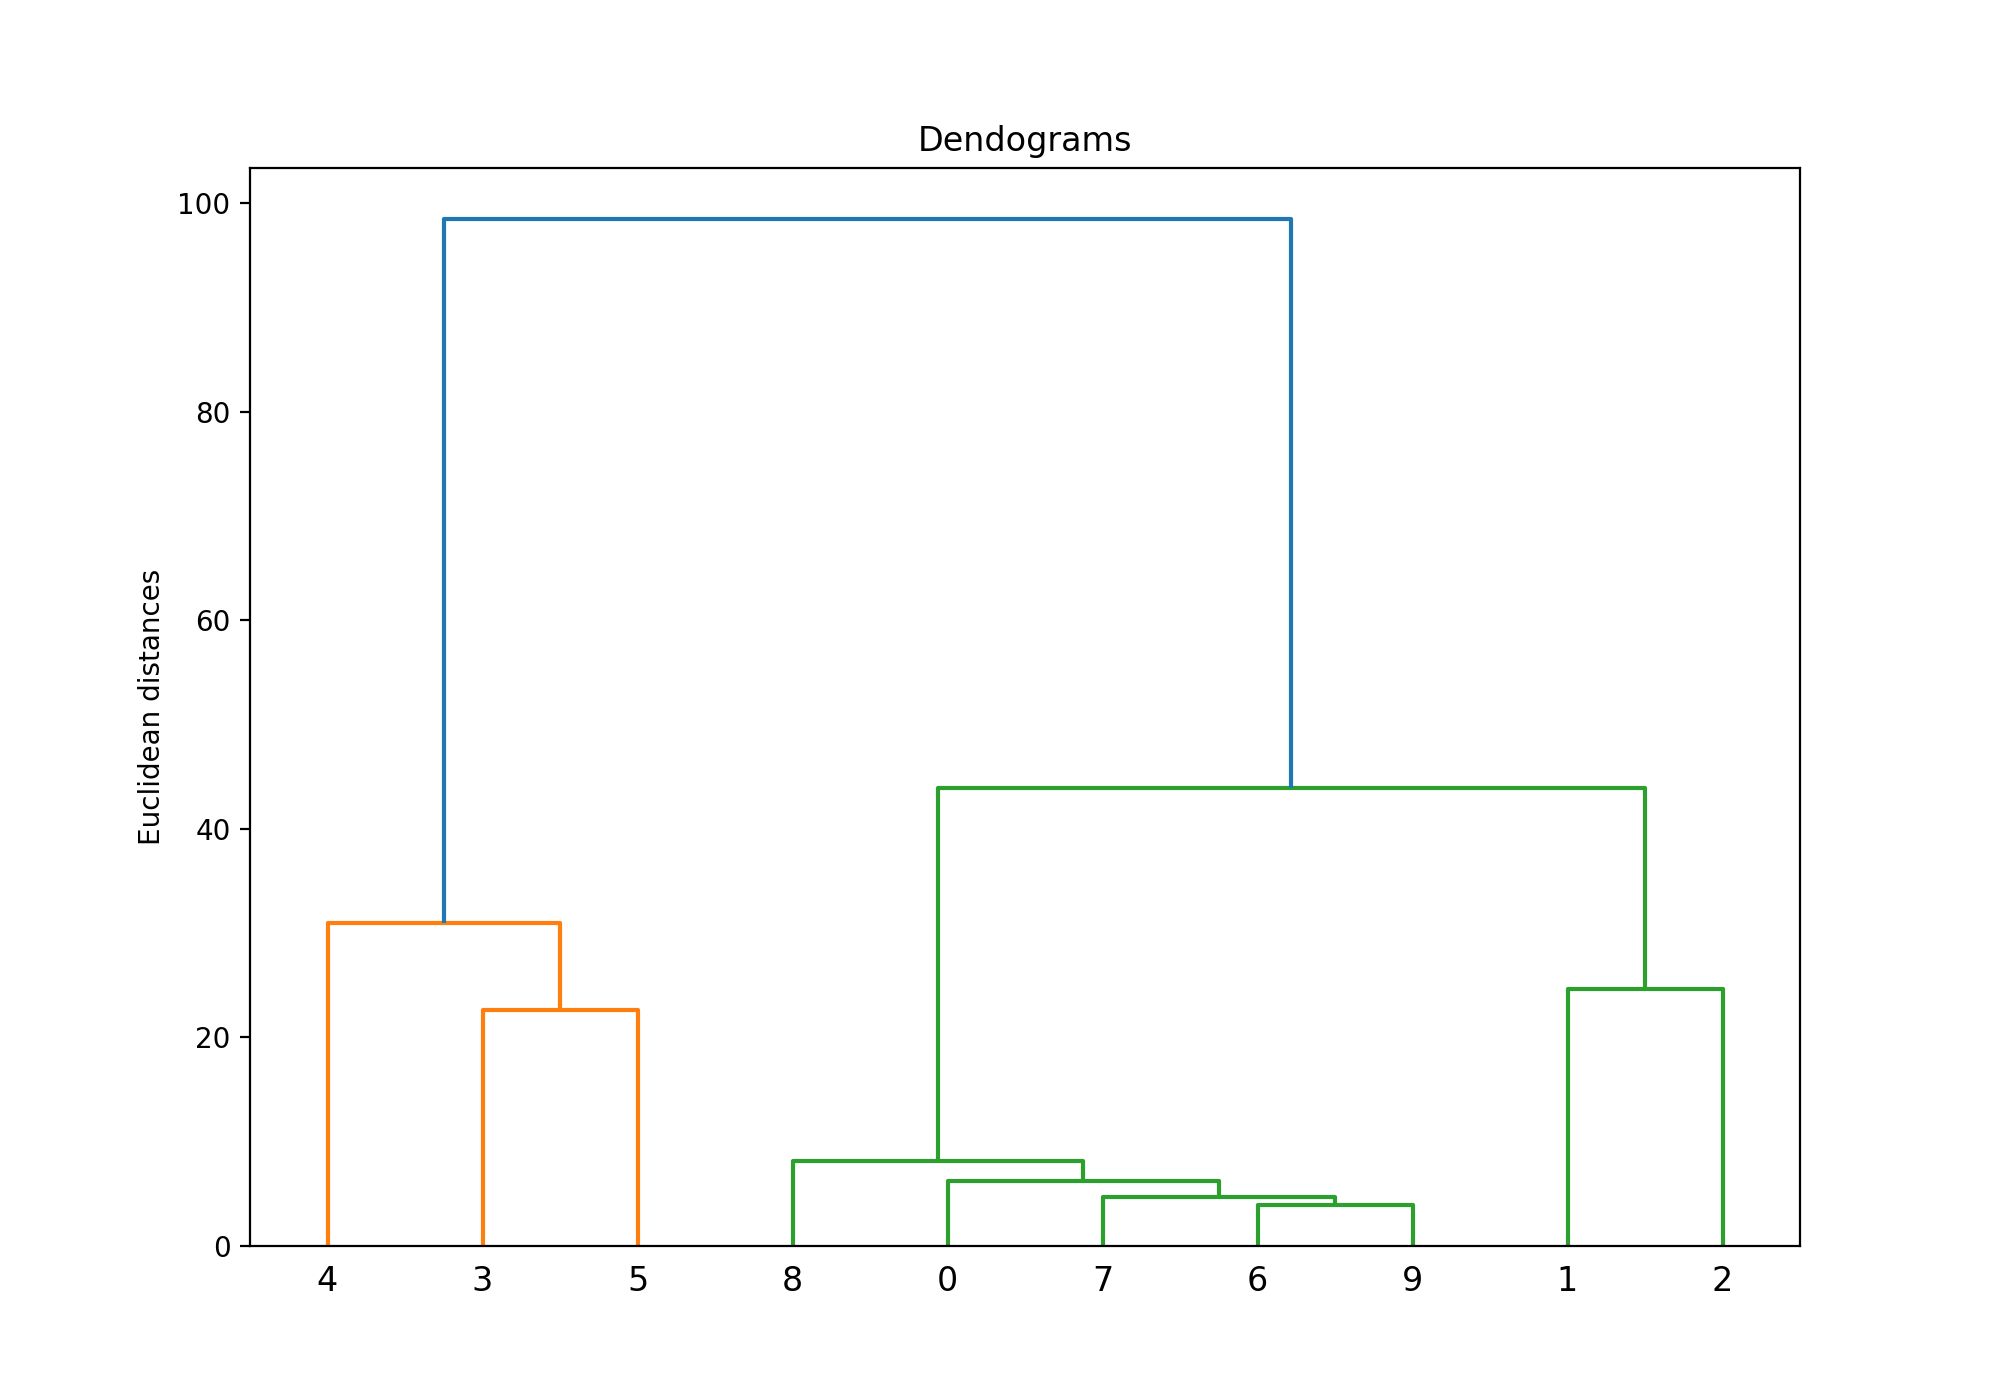

In [37]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_all_num, method='ward'))

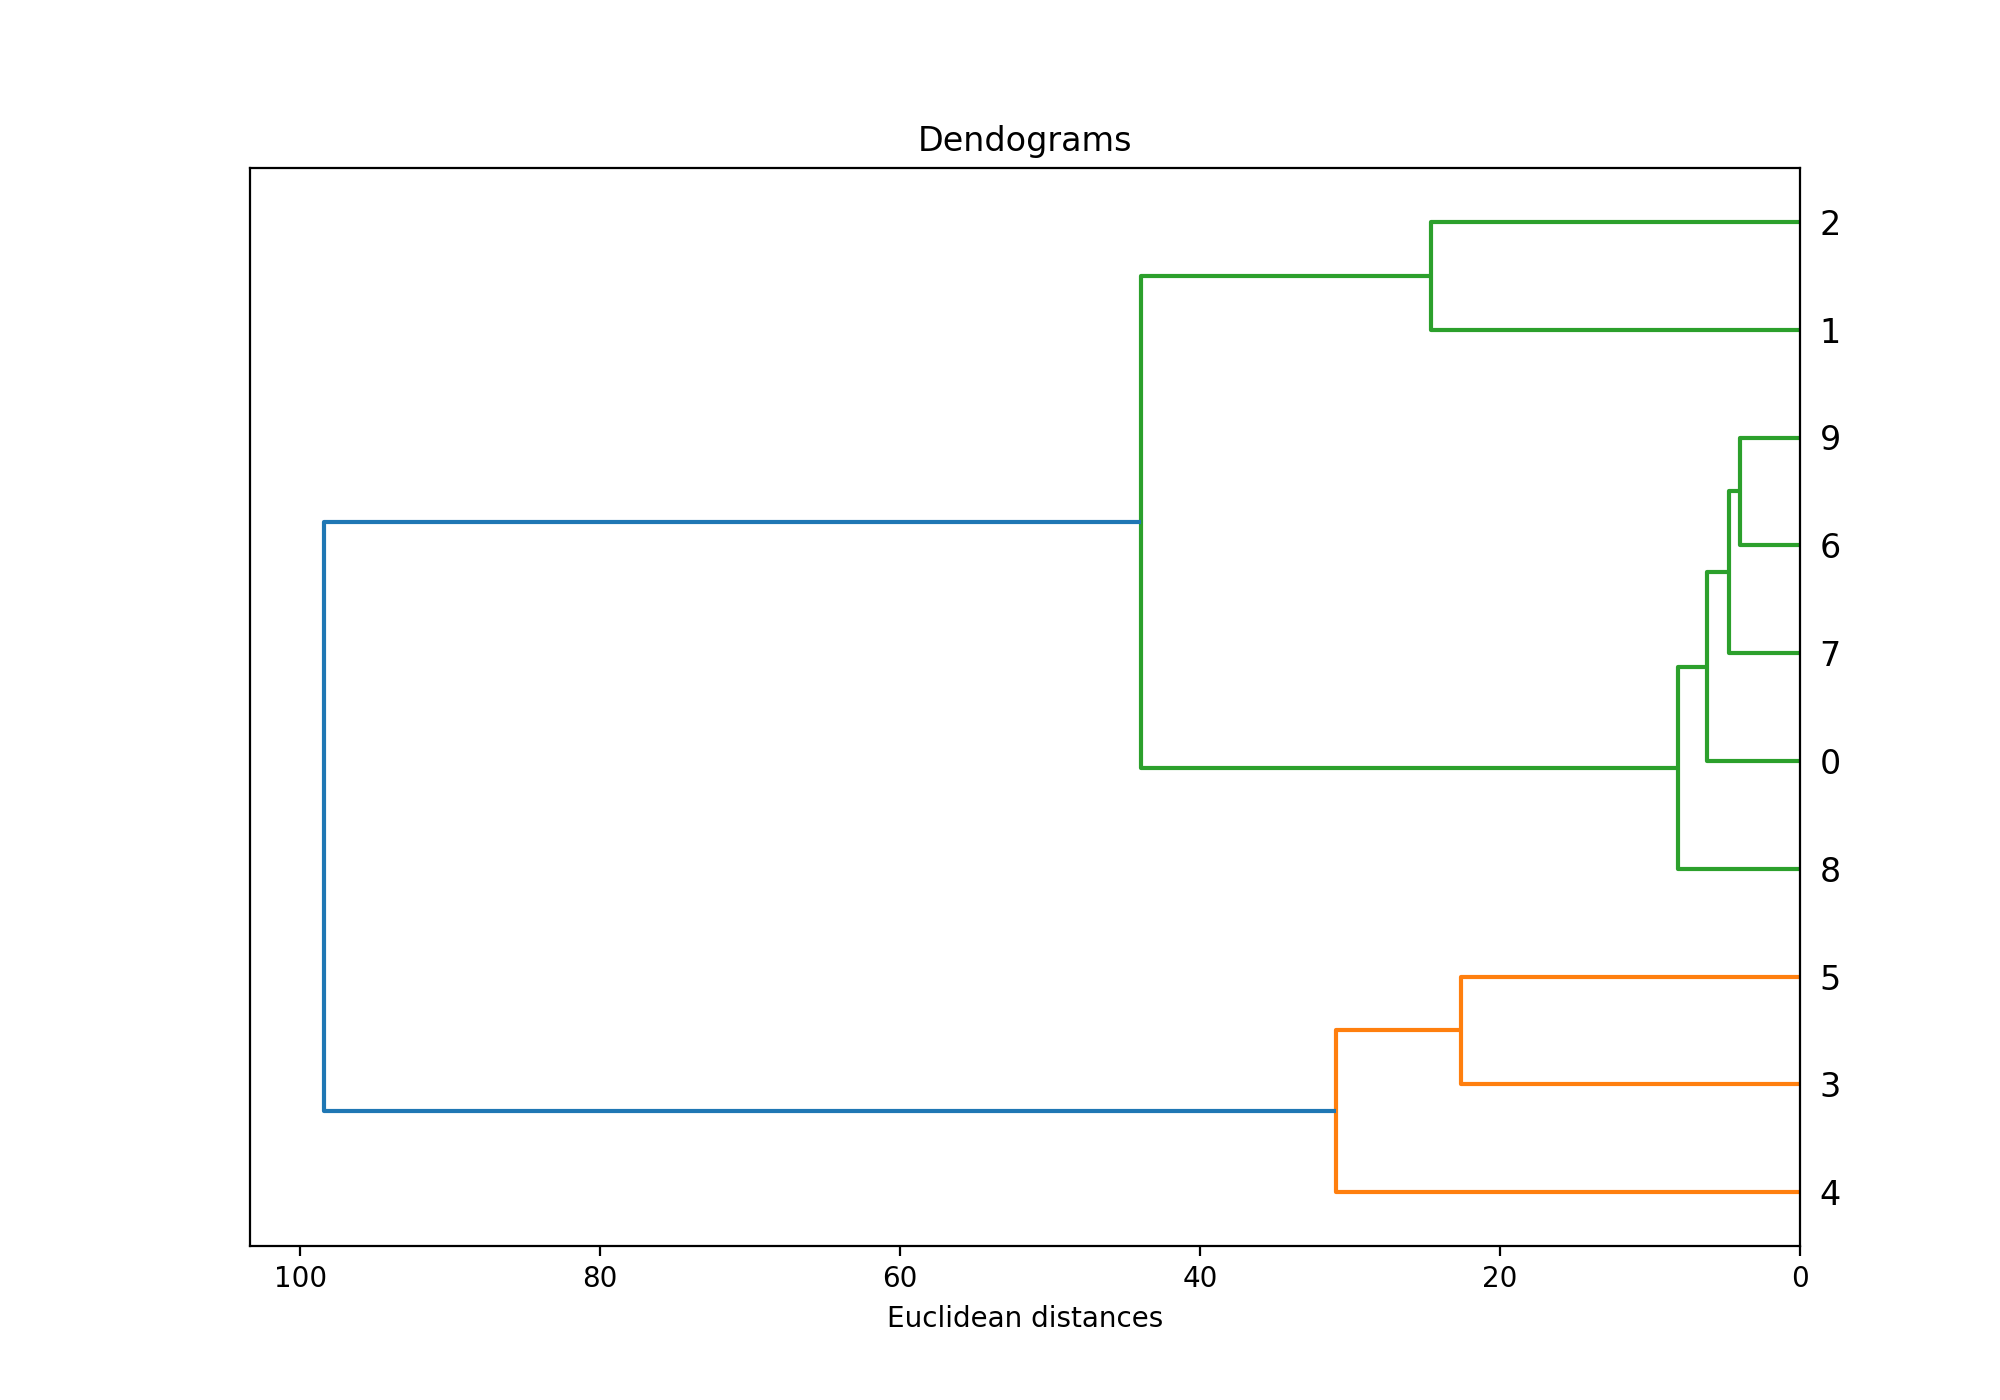

In [38]:
## อันนี้แบบเอียงเด้อ จะได้ใส้ชื่อง่ายขึ้น

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
plt.xlabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_all_num, method='ward'), orientation='left')


In [39]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_all_num)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [43]:
# Add the cluster to the dataframe
hiera_summary_all = dataset_all.copy()
# hiera_summary_all.drop(index=10, inplace=True)
hiera_summary_all['Cluster Labels'] = cluster.labels_

In [44]:
hiera_summary_all = hiera_summary_all.iloc[: , [693,694]]

hiera_summary_all = hiera_summary_all.sort_values(by='Cluster Labels')
hiera_summary_all.to_csv("hiera_2_cluster.csv")
hiera_summary_all

,disorder,Cluster Labels
1,Dementia,0
2,Alcoholic,0
3,Addicted to other drugs,0
7,Intellectual Disabilities,0
8,Learning Disabilities,0
9,Autistic Disorder,0
10,Self-Harm,0
4,Schizophrenia,1
5,Depression,1
6,Anxiety Disorder,1


In [45]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_all_num)

array([2, 1, 1, 0, 0, 0, 2, 2, 2, 2])

In [46]:
# Add the cluster to the dataframe
hiera_summary_all2 = dataset_all.copy()
# hiera_summary_all2.drop(index=10, inplace=True)
hiera_summary_all2['Cluster Labels'] = cluster.labels_

In [47]:
hiera_summary_all2 = hiera_summary_all2.iloc[: , [693,694]]

hiera_summary_all2 = hiera_summary_all2.sort_values(by='Cluster Labels')
hiera_summary_all2.to_csv("hiera_3_cluster.csv")
hiera_summary_all2

,disorder,Cluster Labels
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
2,Alcoholic,1
3,Addicted to other drugs,1
1,Dementia,2
7,Intellectual Disabilities,2
8,Learning Disabilities,2
9,Autistic Disorder,2
10,Self-Harm,2




---



## ข้างล่างนี้คือไม่ใช้แร้ว

## K-mean clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
scikit_pca = PCA(n_components=6)
X_pca = scikit_pca.fit_transform(dataset)
dataset_pca = pd.DataFrame(X_pca)
dataset_pca

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(dataset_pca).predict(dataset_pca)
    print("K = {}, Silhouette score = {:1.4f}".format(k,silhouette_score(dataset_pca, labels)))

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(dataset_pca)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o', alpha=0.5, ms=8)
plt.xlabel("Number of clusters (K) ")
plt.ylabel("SSE")
plt.tight_layout();
plt.savefig('elbow_output.png', dpi=300, format='png', bbox_inches='tight')

In [ ]:
# Number of clusters
K = 2
# Fit the input data
kmeans = KMeans(n_clusters=K).fit(dataset_pca)

In [ ]:
# Add the cluster to the dataframe
kmean_result = dataset_pca.copy()
kmean_result['disorder'] = disorder
kmean_result['Cluster Labels'] = kmeans.labels_

kmean_result = kmean_result.iloc[: , [6,7]]
kmean_result = kmean_result.sort_values(by='Cluster Labels')

kmean_result

In [ ]:
# Number of clusters
K = 3
# Fit the input data
kmeans = KMeans(n_clusters=K).fit(dataset_pca)

# Add the cluster to the dataframe
kmean_result = dataset_pca.copy()
kmean_result['disorder'] = disorder
kmean_result['Cluster Labels'] = kmeans.labels_

kmean_result = kmean_result.loc[: , ["disorder","Cluster Labels"]]
kmean_result = kmean_result.sort_values(by='Cluster Labels')

kmean_result

### Dataset for K-prototype clustering

In [ ]:
def split(df):

    data = df.drop(columns=['Addicted to Amphetamine','Other Mental Illnesses','Bipolar Disorder',
               'Game Addiction(Older than 15 years old)','Game Addiction(Younger than 15 years old)',
               'Other Psychosis','Male_population', 'Women_population', 'Total_population'])

    df_split = []

    for i in range(1, 13) :
        disorder = data.iloc[:,[0, i]]
        disorder['disorder'] = data.columns[i]
        disorder.columns = ['province', 'frequency', 'disorder']
        df_split.append(disorder)

    return df_split

In [ ]:
list_58 = split(df_58)
list_59 = split(df_59)
list_60 = split(df_60)
list_61 = split(df_61)
list_62 = split(df_62)
list_63 = split(df_63)
list_64 = split(df_64)

In [ ]:
def append_loop(list_of_df) :
  for i in range(11) :
    if i == 0 :
      df1 = list_of_df[i]
      df2 = list_of_df[i + 1]
      df_append = df1.append(df2)
    else :
      df2 = list_of_df[i + 1]
      df_append = df_append.append(df2)
  return df_append

In [ ]:
y_58 = append_loop(list_58)
y_59 = append_loop(list_59)
y_60 = append_loop(list_60)
y_61 = append_loop(list_61)
y_62 = append_loop(list_62)
y_63 = append_loop(list_63)
y_64 = append_loop(list_64)

In [ ]:
dataset = [y_58, y_59, y_60, y_61, y_62, y_63, y_64]
for i in range(6) :
  if i == 0 :
    df1 = dataset[i]
    df2 = dataset[i + 1]
    final_dataset = df1.append(df2)
  else :
    df2 = dataset[i + 1]
    final_dataset = final_dataset.append(df2)

final_dataset

In [ ]:
from numpy import array
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['province']]).toarray())
final_df = final_dataset.join(encoder_df)
final_df.drop('province', axis=1, inplace=True)
final_df.columns = [ 'frequency', 'disorder', 'province_00', 'province_01', 'province_02', 'province_03'
                    , 'province_04', 'province_05', 'province_06', 'province_07', 'province_08', 'province_09', 'province_10'
                    , 'province_11', 'province_12', 'province_13', 'province_14', 'province_15', 'province_16', 'province_17'
                    , 'province_18', 'province_19', 'province_20', 'province_21', 'province_22', 'province_23', 'province_24'
                    , 'province_25', 'province_26', 'province_27', 'province_28', 'province_29', 'province_30', 'province_31'
                    , 'province_32', 'province_33', 'province_34', 'province_35', 'province_36', 'province_37', 'province_38'
                    , 'province_39', 'province_40', 'province_41', 'province_42', 'province_43', 'province_44', 'province_45'
                    , 'province_46', 'province_47', 'province_48', 'province_49', 'province_50', 'province_51', 'province_52'
                    , 'province_53', 'province_54', 'province_55', 'province_56', 'province_57', 'province_58', 'province_59'
                    , 'province_60', 'province_61', 'province_62', 'province_63', 'province_64', 'province_65', 'province_66'
                    , 'province_67', 'province_68', 'province_69', 'province_70', 'province_71', 'province_72', 'province_73'
                    , 'province_74', 'province_75', 'province_76']
final_df

In [ ]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
df_list = [df_58, df_59, df_60, df_61, df_62, df_63, df_64]
df_list_tp = []

for df in df_list :
  df = df.drop(columns=['NAME_1','ADHD','Addicted to Amphetamine','Other Mental Illnesses','Bipolar Disorder',
              'Game Addiction(Older than 15 years old)','Game Addiction(Younger than 15 years old)',
              'Other Psychosis','Male_population', 'Women_population', 'Total_population'])

  disorder = df.columns
  df = df.transpose()

  #df = df.apply(lambda x : (x - df.mean())/df.std(), axis=1)
  #df = df.fillna(0)
  df = pd.DataFrame(std_scaler.fit_transform(df), columns = df.columns)

  df['disorder'] = disorder
  df.index = range(1, 12)

  df_list_tp.append(df)

dataset_58 = df_list_tp[0]
dataset_59 = df_list_tp[1]
dataset_60 = df_list_tp[2]
dataset_61 = df_list_tp[3]
dataset_62 = df_list_tp[4]
dataset_63 = df_list_tp[5]
dataset_64 = df_list_tp[6]

### Data 2015-2021

#### Dataset 58

In [ ]:
dfMatrix = dataset_58.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

In [ ]:
# Add the cluster to the dataframe
data = dataset_58.copy()
data['Cluster Labels'] = kprototype.labels_

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = data, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_58 = data.iloc[: , [77,78]]

summary_58 = summary_58.sort_values(by='Cluster Labels')
summary_58

#### Dataset 59

In [ ]:
dfMatrix = dataset_59.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

In [ ]:
# Add the cluster to the dataframe
dataset_59['Cluster Labels'] = kprototype.labels_

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_59, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_59 = dataset_59.iloc[: , [77,78]]

summary_59 = summary_59.sort_values(by='Cluster Labels')
summary_59

#### Dataset 60

In [ ]:
dfMatrix = dataset_60.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

In [ ]:
# Add the cluster to the dataframe
dataset_60['Cluster Labels'] = kprototype.labels_

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_60, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_60 = dataset_60.iloc[: , [77,78]]

summary_60 = summary_60.sort_values(by='Cluster Labels')
summary_60

#### Dataset 61

In [ ]:
dfMatrix = dataset_61.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

In [ ]:
# Add the cluster to the dataframe
dataset_61['Cluster Labels'] = kprototype.labels_

In [ ]:
summary_61 = dataset_61.iloc[: , [77,78]]

summary_61 = summary_61.sort_values(by='Cluster Labels')
summary_61

#### Dataset 62

In [ ]:
dfMatrix = dataset_62.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 6), 'Cost':cost})

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

In [ ]:
# Add the cluster to the dataframe
dataset_62['Cluster Labels'] = kprototype.labels_

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_62, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_62 = dataset_62.iloc[: , [77,78]]

summary_62 = summary_62.sort_values(by='Cluster Labels')
summary_62

#### Dataset 63

In [ ]:
dfMatrix = dataset_63.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 6), 'Cost':cost})

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

In [ ]:
# Add the cluster to the dataframe
dataset_63['Cluster Labels'] = kprototype.labels_

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_63, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_63 = dataset_63.iloc[: , [77,78]]

summary_63 = summary_63.sort_values(by='Cluster Labels')
summary_63

#### Dataset 64

In [ ]:
dfMatrix = dataset_64.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

In [ ]:
# Add the cluster to the dataframe
dataset_64['Cluster Labels'] = kprototype.labels_

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_64, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_64 = dataset_64.iloc[: , [77,78]]

summary_64 = summary_64.sort_values(by='Cluster Labels')
summary_64

### final dataset

In [ ]:
dfMatrix = final_dataset.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [0, 2])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [0, 2])

In [ ]:
# Add the cluster to the dataframe
final_dataset['Cluster Labels'] = kprototype.labels_
final_dataset['Segment'] = final_dataset['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth'})
final_dataset

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = final_dataset, y = 'Cluster Labels',palette="pastel")

In [ ]:
# Cluster interpretation
final_dataset.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
final_dataset.groupby('Segment').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'disorder': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }
).reset_index()

In [ ]:
colors = ['#574E83', '#B24A4B', '#FF847C', '#FFB37F', '#FF487E', '#7C73E6', '#3E84A8', '#29CDB5', '#6A9C77', '#FEC93B', '#54B2F5', '#C5CD78']

In [ ]:
first_segment = final_dataset.loc[final_dataset['Segment'] == 'First']

first_segment.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
first_segment = first_segment.groupby('disorder').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }).reset_index()
first_segment

In [ ]:
first_segment = first_segment.sort_values(by=['Total'])
plt.barh(first_segment['disorder'], first_segment['Total'], height=0.9, color =colors)

In [ ]:
second_segment = final_dataset.loc[final_dataset['Segment'] == 'Second']

second_segment.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
second_segment = second_segment.groupby('disorder').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }).reset_index()
second_segment

In [ ]:
second_segment = second_segment.sort_values(by=['Total'])
plt.barh(second_segment['disorder'], second_segment['Total'], height=0.9, color =colors)

In [ ]:
third_segment = final_dataset.loc[final_dataset['Segment'] == 'Third']

third_segment.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
third_segment = third_segment.groupby('disorder').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }).reset_index()
third_segment

In [ ]:
third_segment = third_segment.sort_values(by=['Total'])
plt.barh(third_segment['disorder'], third_segment['Total'], height=0.9, color =colors)

In [ ]:
fourth_segment = final_dataset.loc[final_dataset['Segment'] == 'Fourth']

fourth_segment.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
fourth_segment = fourth_segment.groupby('disorder').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }).reset_index()
fourth_segment

In [ ]:
fourth_segment = fourth_segment.sort_values(by=['Total'])
plt.barh(fourth_segment['disorder'], fourth_segment['Total'], height=0.9, color =colors)



---



### วิธีเก่า

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

VER.1 ใช้ **mental_58-64_data**

In [ ]:
# เปิดไฟล์
import pandas as pd
df_58to64 = pd.read_excel('/content/drive/MyDrive/ColabNotebooks/Thai Mental/4.Calculate/12 types of mental_58-64_data_calculated.xlsx')
df_58to64.head()

In [ ]:
#df_ = df_58to64[df_58to64['year'] == 58]
#df_

In [ ]:
data = df_58to64.iloc[:, 1:13]
data

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

แบ่งได้ 4 clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)